In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle as pk
import os
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.datasets import fashion_mnist
from keras.models import Model
from tensorflow.keras.layers import Dense

In [73]:
#data loading
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pk.load(fo, encoding='bytes')
    return dict
basefolder = os.path.dirname(os.getcwd())
datafolder = os.path.join(basefolder, "dataset\cifar-10-python\cifar-10-batches-py")
allfiles = [f for f in os.listdir(datafolder) if f.startswith('data')]
traindata = None
trainlabels = None
#train split

for i in allfiles:
    alldata = unpickle(os.path.join(datafolder, i))
    images = alldata[b'data']
    labels = alldata[b'labels']
    if(traindata is None):
        traindata = images
        trainlabels = labels
    else:
        traindata = np.append(traindata, images, axis=0)
        trainlabels.extend(labels)

#test split
testbatch = unpickle(os.path.join(datafolder, 'test_batch'))
testdata = testbatch[b'data']
testlabels = testbatch[b'labels']
#label conversions
labeldict = unpickle(os.path.join(datafolder, 'batches.meta'))
labelconversions = labeldict[b'label_names']
print(traindata.shape)
print(testdata.shape)
testdata = testdata.astype(float)/255
traindata = traindata.astype(float)/255

(50000, 3072)
(10000, 3072)


In [89]:
#display image
def displayImage32(imgvec):
    red = (imgvec[:1024].reshape((32,32)))*255
    green = (imgvec[1024:2048].reshape((32,32)))*255
    blue = (imgvec[2048:].reshape((32,32)))*255
    imgarr = np.stack((red, green, blue), axis = 2).astype(np.uint8)
    img = Image.fromarray(imgarr)
    img.show()
def numpify(imgvec):
    red = (imgvec[:1024].reshape((32,32)))*255
    green = (imgvec[1024:2048].reshape((32,32)))*255
    blue = (imgvec[2048:].reshape((32,32)))*255
    imgarr = np.stack((red, green, blue), axis = 2).astype(np.uint8)
    return imgarr

In [58]:
autoencoder = tf.keras.Sequential([
    # Encoder
    Dense(200, activation='relu', input_shape=(3072,)),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),

    # Decoder
    Dense(100, activation='relu'),
    Dense(200, activation='relu'),
    Dense(3072, activation='sigmoid')  # Sigmoid activation for pixel values between 0 and 1
])


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [60]:
autoencoder.fit(traindata, traindata, epochs=10, batch_size=256, shuffle=True, validation_data=(testdata, testdata))

Epoch 1/10
196/196 [==============================] - 6s 26ms/step - loss: 0.6414 - val_loss: 0.6206
Epoch 2/10
196/196 [==============================] - 5s 23ms/step - loss: 0.6088 - val_loss: 0.6030
Epoch 3/10
196/196 [==============================] - 5s 25ms/step - loss: 0.6002 - val_loss: 0.5996
Epoch 4/10
196/196 [==============================] - 5s 25ms/step - loss: 0.5966 - val_loss: 0.5951
Epoch 5/10
196/196 [==============================] - 5s 25ms/step - loss: 0.5933 - val_loss: 0.5932
Epoch 6/10
196/196 [==============================] - 5s 25ms/step - loss: 0.5913 - val_loss: 0.5908
Epoch 7/10
196/196 [==============================] - 5s 24ms/step - loss: 0.5899 - val_loss: 0.5905
Epoch 8/10
196/196 [==============================] - 5s 24ms/step - loss: 0.5891 - val_loss: 0.5891
Epoch 9/10
196/196 [==============================] - 5s 23ms/step - loss: 0.5879 - val_loss: 0.5886
Epoch 10/10
196/196 [==============================] - 5s 24ms/step - loss: 0.5871 - val_lo

In [ ]:
decoded_imgs = autoencoder.predict(testdata)

(10000, 3072)


Text(0.5, 1.0, 'Original')

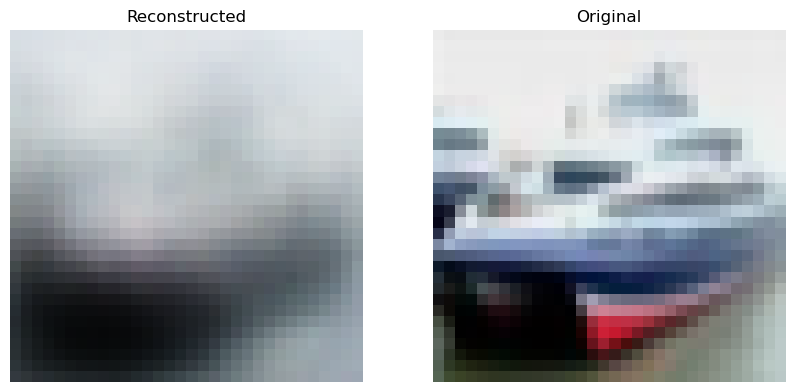

In [94]:
print(decoded_imgs.shape)
ind = 1
fig = plt.figure(figsize=(10, 5)) 
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(numpify(decoded_imgs[ind]))
plt.axis('off') 
plt.title("Reconstructed") 
fig.add_subplot(rows, columns, 2)
plt.imshow(numpify(testdata[ind]))
plt.axis('off') 
plt.title("Original") 

In [82]:
displayImage32(decoded_imgs[1])
displayImage32(testdata[1])